In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

### EDA process

In [64]:
train = pd.read_csv('train.csv')
train

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1
85,85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1


In [94]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(59, 12)


,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
0,0,2843.0,156.0,1358.52,730.78,637.85,127.06,94.82,1588.62,45,1,3256.0
1,1,437.0,137.0,509.43,268.05,243.07,390.86,98.24,1002.76,51,1,491.0
2,2,826.0,82.0,1232.22,493.42,744.08,516.28,320.15,2200.58,32,0,1381.0
3,3,861.0,50.0,1512.86,925.51,590.07,380.25,25.80,1929.10,50,0,1377.0
4,4,1160.0,157.0,890.42,403.91,489.53,266.92,87.63,1251.52,43,0,1844.0


In [66]:
sample_submission = pd.read_csv('sample_submission.csv')
print(sample_submission.shape)
sample_submission.head()

(59, 2)


,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


#### label value distribution

0    58
1    29
Name: label, dtype: int64


<AxesSubplot:ylabel='Frequency'>

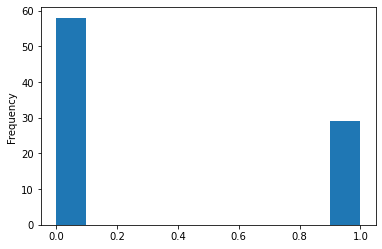

In [67]:
print(train['label'].value_counts())
train['label'].plot.hist()

#### missing value

In [68]:
train.isnull().sum()

id                          0
MO HLADR+ MFI (cells/ul)    1
Neu CD64+MFI (cells/ul)     1
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    1
label                       0
dtype: int64

#### value type

In [38]:
train.dtypes.value_counts()

float64    9
int64      4
dtype: int64

In [69]:
label = train['label']

### Model 1: LogisticRegression

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

train_ids = train['id']
test_ids = test['id']

train_1 = train.drop(columns = ['id', 'label'])
test_1 = test.drop(columns = ['id'])

# Fill missing values with median value
imputer = SimpleImputer(strategy = 'median')

scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data and transform both train and test data
imputer.fit(train_1)
train_1 = imputer.transform(train_1)
test_1 = imputer.transform(test_1)

scaler.fit(train_1)
train_1 = scaler.transform(train_1)
test_1 = scaler.transform(test_1)

print('Training data shape: ', train_1.shape)
print('Testing data shape: ', test_1.shape)

Training data shape:  (87, 11)
Testing data shape:  (59, 11)


In [91]:
from sklearn.linear_model import LogisticRegression

# Set regularization parameter with 0.0001
log_reg = LogisticRegression(C = 0.0001)

log_reg.fit(train_1, label)

LogisticRegression(C=0.0001)

In [95]:
log_reg_pred = log_reg.predict_proba(test.drop(columns='id'))[:, 1]

In [97]:
new_pred = []
for i in log_reg_pred:
    if i>=0.5:
        new_pred.append(1)
    else:
        new_pred.append(0)
print(new_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### submission 1

In [31]:
submit_1 = sample_submission.copy()
submit_1['label'] = new_pred

submit_1.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [32]:
submit_1.to_csv('submit_1.0.csv', index = False)

### Model 2: LightGBM

In [44]:
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

import gc

In [59]:
def model(features, test_features, n_folds = 2):
    
    train_ids = features['id']
    test_ids = test_features['id']

    labels = features['label']
    
    features = features.drop(columns = ['id', 'label'])
    test_features = test_features.drop(columns = ['id'])
    
#     # one-hot encoding
#     features = pd.get_dummies(features)
#     test_features = pd.get_dummies(test_features)
    
#     features, test_features = features.align(test_features, join = 'inner', axis = 1)
    
    cat_indices = 'auto'
    
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    feature_names = list(features.columns)
    
    features = np.array(features)
    test_features = np.array(test_features)
    
    # KFold for cross validation
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    feature_importance_values = np.zeros(len(feature_names))
    test_predictions = np.zeros(test_features.shape[0])
    out_of_fold = np.zeros(features.shape[0])
    
    valid_scores = []
    train_scores = []
    
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Modeling
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        best_iteration = model.best_iteration_
        
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    submission = pd.DataFrame({'id': test_ids, 'label': test_predictions})
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    valid_auc = roc_auc_score(labels, out_of_fold)

    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})
    
    return submission, feature_importances, metrics

In [60]:
submission_raw, fi_raw, metrics_raw = model(train, test)

Training Data Shape:  (87, 11)
Testing Data Shape:  (59, 11)


In [61]:
submission_raw.head(10)

,id,label
0,0,0.349495
1,1,0.233016
2,2,0.142150
3,3,0.176272
4,4,0.218861
5,5,0.142150
6,6,0.112237
7,7,0.142150
8,8,0.246967
9,9,0.112237


#### submission 2

In [62]:
y_pred = submission_raw['label'].tolist()
new_pred = []
for i in y_pred:
    if i>=0.5:
        new_pred.append(1)
    else:
        new_pred.append(0)

In [63]:
submit_2 = submission_raw.copy()
submit_2['label'] = new_pred
submit_2.head(10)

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [58]:
submit_2.to_csv('submit_2.0.csv', index = False)

### Model 3: RandomForest and Grid Search

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {'criterion':('gini','entropy'), 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,5],'max_features':["auto", "sqrt", "log2"],
             'oob_score':[True,False],'class_weight':["balanced","balanced_subsample"]}

rf = RandomForestClassifier(200,random_state = 39)

clf = GridSearchCV(rf, parameters,cv = 10)

clf.fit(train_1,label)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=39),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ('gini', 'entropy'),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'oob_score': [True, False]})

In [84]:
y_pred = clf.predict_proba(test_1)[:,1]

new_pred = []
for i in y_pred:
    if i>=0.5:
        new_pred.append(1)
    else:
        new_pred.append(0)

#### submission 3

In [88]:
submit_3 = sample_submission.copy()
submit_3['label'] = new_pred
submit_3.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [89]:
submit_3.to_csv('submit_3.0.csv', index = False)